In [53]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [54]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [56]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [58]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [60]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [61]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

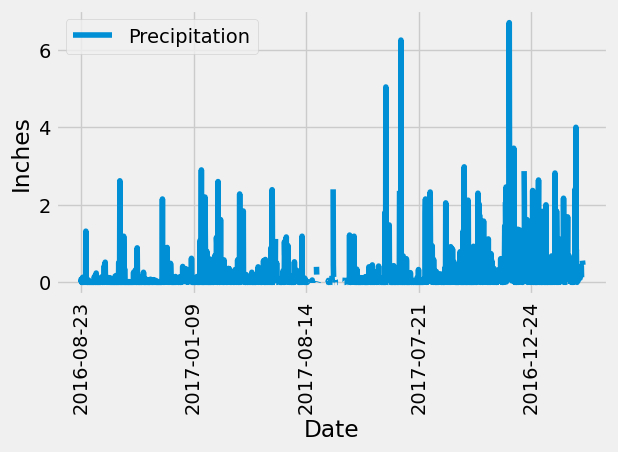

In [130]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

query_date = dt.date(2017,8,23)-dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
sel=[Measurement.date,
    Measurement.prcp]
last_year= session.query(*sel).\
filter(Measurement.date >= query_date)

# Save the query results as a Pandas DataFrame. Explicitly set the column names

last_year_df = pd.DataFrame(last_year,columns=['Date','Precipitation'])
# Sort the dataframe by date
last_year_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
last_year_df.plot()
plt.xticks(rotation=90)
plt.ylabel('Inches')
plt.tight_layout()
plt.show()


In [63]:
# Use Pandas to calculate the summary statistics for the precipitation data
last_year_df.describe()

,Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [98]:
# Design a query to calculate the total number of stations in the dataset
len(session.query(Measurement.station).distinct().all())


9

In [107]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
     group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).limit(5).all()
    


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612)]

In [116]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
filter(Measurement.station=='USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

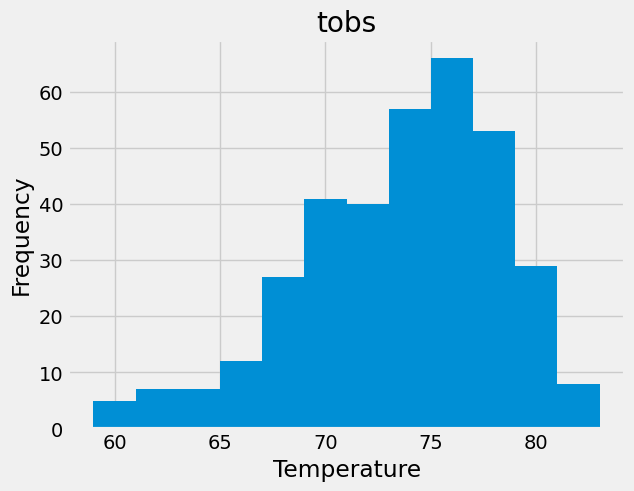

In [136]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
select = [Measurement.tobs]
most_active_station = session.query(*select).\
filter(Measurement.station =='USC00519281').\
filter(Measurement.date>=query_date)
most_active_station = pd.DataFrame(most_active_station)
most_active_station.hist(bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [138]:
# Close Session
session.close()